In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
asset = 'ADA' 
freq = '1min'

DATA_DIR = Path('../dataset')
path = DATA_DIR / f"{asset}_{freq}.csv"
if path.exists():
    print(f'Loading {asset} from {path}')
    df = pd.read_csv(path,index_col=0)
    df['timestamp'] = pd.to_datetime(df["system_time"])
    df['timestamp'] = df['timestamp'].dt.round('min')
    df = df.sort_values('timestamp').set_index('timestamp')
print(f"{asset}: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head(3))

Loading ADA from ../dataset/ADA_1min.csv
ADA: 17109 rows, 155 columns


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:34:00+00:00,2021-04-07 11:33:59.055697+00:00,1.162050,0.000100,56936.467913,258248.957367,-0.000043,-0.000129,-0.000301,-0.000473,-0.000731,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:35:00+00:00,2021-04-07 11:34:59.055697+00:00,1.168000,0.002200,56491.336799,78665.286640,-0.000942,-0.001027,-0.001113,-0.001199,-0.001370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:36:00+00:00,2021-04-07 11:35:59.055697+00:00,1.175300,0.001200,52859.493359,48459.173836,-0.000511,-0.000596,-0.000766,-0.000851,-0.000936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Missing and Zero values

In [4]:
print(f"Missing values: {df.isna().sum().sum()} total ({(df.isna().sum().sum()/df.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


There are no missing values

In [5]:
print(f"Zero values: {df.isin([0]).sum().sum()} total ({(df.isin([0]).sum().sum()/df.size)*100:.3f}%)")

Zero values: 676204 total (25.499%)


But there are a lot of Zero values

In [6]:
# check for all columns except those related to 'market', 'cancel', 'limit'
most_zeros = df.columns.str.contains('market|cancel|limit', case=False)

print(f"Zero values without market/cancel/limit columns: {df[df.columns[~most_zeros]].isin([0]).sum().sum()} total ({(df[df.columns[~most_zeros]].isin([0]).sum().sum()/df[df.columns[~most_zeros]].size)*100:.3f}%)")
df[df.columns[~most_zeros]].isin([0]).sum().nlargest(5)

Zero values without market/cancel/limit columns: 18 total (0.002%)


asks_notional_0    9
bids_notional_0    5
sells              4
system_time        0
midpoint           0
dtype: int64

Most zero values are in additional descriptive columns {'market', 'cancel', 'limit'} 

In [7]:
market_columns = df.columns.str.contains('market', case=False)

print(f"Zero values in market columns: {df[df.columns[market_columns]].isin([0]).sum().sum()} total ({(df[df.columns[market_columns]].isin([0]).sum().sum()/df[df.columns[market_columns]].size)*100:.3f}%)")
df[df.columns[market_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in market columns: 477959 total (93.120%)


bids_market_notional_14    17025
bids_market_notional_13    16995
bids_market_notional_12    16969
bids_market_notional_11    16950
bids_market_notional_10    16944
bids_market_notional_9     16920
bids_market_notional_8     16906
asks_market_notional_14    16886
asks_market_notional_13    16854
bids_market_notional_7     16850
bids_market_notional_6     16818
asks_market_notional_12    16778
asks_market_notional_11    16709
bids_market_notional_5     16694
asks_market_notional_10    16648
bids_market_notional_4     16622
asks_market_notional_9     16582
asks_market_notional_8     16439
bids_market_notional_3     16432
asks_market_notional_7     16386
asks_market_notional_6     16249
bids_market_notional_2     16100
asks_market_notional_5     16024
asks_market_notional_4     15658
bids_market_notional_1     15568
asks_market_notional_3     15205
asks_market_notional_2     14490
asks_market_notional_1     13003
bids_market_notional_0     12104
asks_market_notional_0      8151
dtype: int

In [8]:
cancel_columns = df.columns.str.contains('cancel', case=False)

print(f"Zero values in cancel columns: {df[df.columns[cancel_columns]].isin([0]).sum().sum()} total ({(df[df.columns[cancel_columns]].isin([0]).sum().sum()/df[df.columns[cancel_columns]].size)*100:.3f}%)")
df[df.columns[cancel_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in cancel columns: 191766 total (37.362%)


bids_cancel_notional_0     10794
asks_cancel_notional_0      9958
asks_cancel_notional_14     8062
asks_cancel_notional_13     7647
bids_cancel_notional_1      7454
asks_cancel_notional_12     7259
asks_cancel_notional_11     6821
bids_cancel_notional_3      6819
asks_cancel_notional_1      6771
bids_cancel_notional_2      6656
bids_cancel_notional_4      6610
asks_cancel_notional_10     6455
bids_cancel_notional_5      6313
asks_cancel_notional_9      6151
asks_cancel_notional_7      6091
asks_cancel_notional_8      6073
asks_cancel_notional_6      5976
asks_cancel_notional_5      5869
asks_cancel_notional_4      5868
bids_cancel_notional_6      5834
asks_cancel_notional_2      5750
asks_cancel_notional_3      5601
bids_cancel_notional_7      5458
bids_cancel_notional_14     5359
bids_cancel_notional_8      5235
bids_cancel_notional_13     5081
bids_cancel_notional_9      5046
bids_cancel_notional_12     4986
bids_cancel_notional_11     4913
bids_cancel_notional_10     4856
dtype: int

In [9]:
limit_columns = df.columns.str.contains('limit', case=False)

print(f"Zero values in limit columns: {df[df.columns[limit_columns]].isin([0]).sum().sum()} total ({(df[df.columns[limit_columns]].isin([0]).sum().sum()/df[df.columns[limit_columns]].size)*100:.3f}%)")
df[df.columns[limit_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in limit columns: 6461 total (1.259%)


asks_limit_notional_14    1433
asks_limit_notional_13    1158
asks_limit_notional_12     883
asks_limit_notional_11     679
asks_limit_notional_10     487
asks_limit_notional_9      339
asks_limit_notional_8      205
bids_limit_notional_14     200
bids_limit_notional_13     138
asks_limit_notional_7      122
bids_limit_notional_12     108
asks_limit_notional_6       73
bids_limit_notional_11      70
bids_limit_notional_10      66
bids_limit_notional_6       63
asks_limit_notional_5       56
bids_limit_notional_5       55
bids_limit_notional_9       48
bids_limit_notional_8       44
asks_limit_notional_4       43
bids_limit_notional_4       39
bids_limit_notional_7       38
asks_limit_notional_3       32
bids_limit_notional_3       21
asks_limit_notional_2       17
asks_limit_notional_1       13
asks_limit_notional_0       11
bids_limit_notional_1        9
bids_limit_notional_2        8
bids_limit_notional_0        3
dtype: int64

Market columns can include up to 90% of zero values (even for the 1st or 2nd level)
Cancel columbs has 37% of zero values.

Limit_Notinal Asks and Bids include just a few zero values.

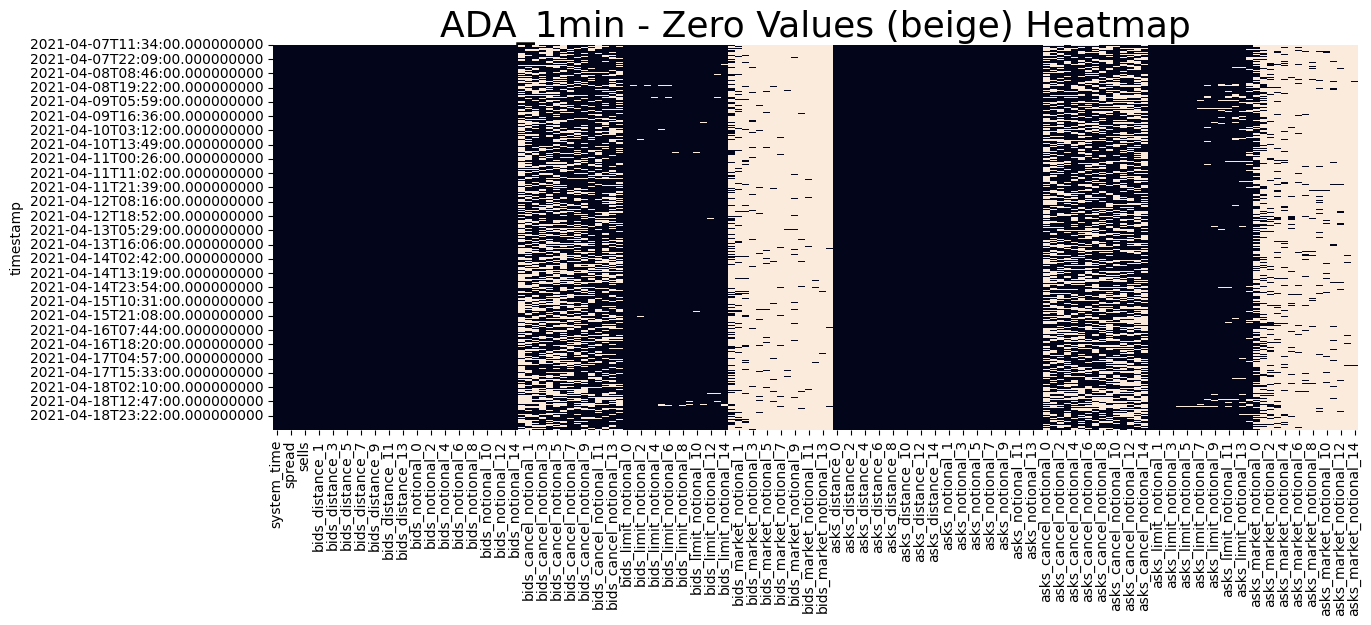

In [10]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(df == 0, cbar=False, ax=ax)
plt.title(f'{asset}_{freq} - Zero Values (beige) Heatmap', fontsize=26)
plt.show()

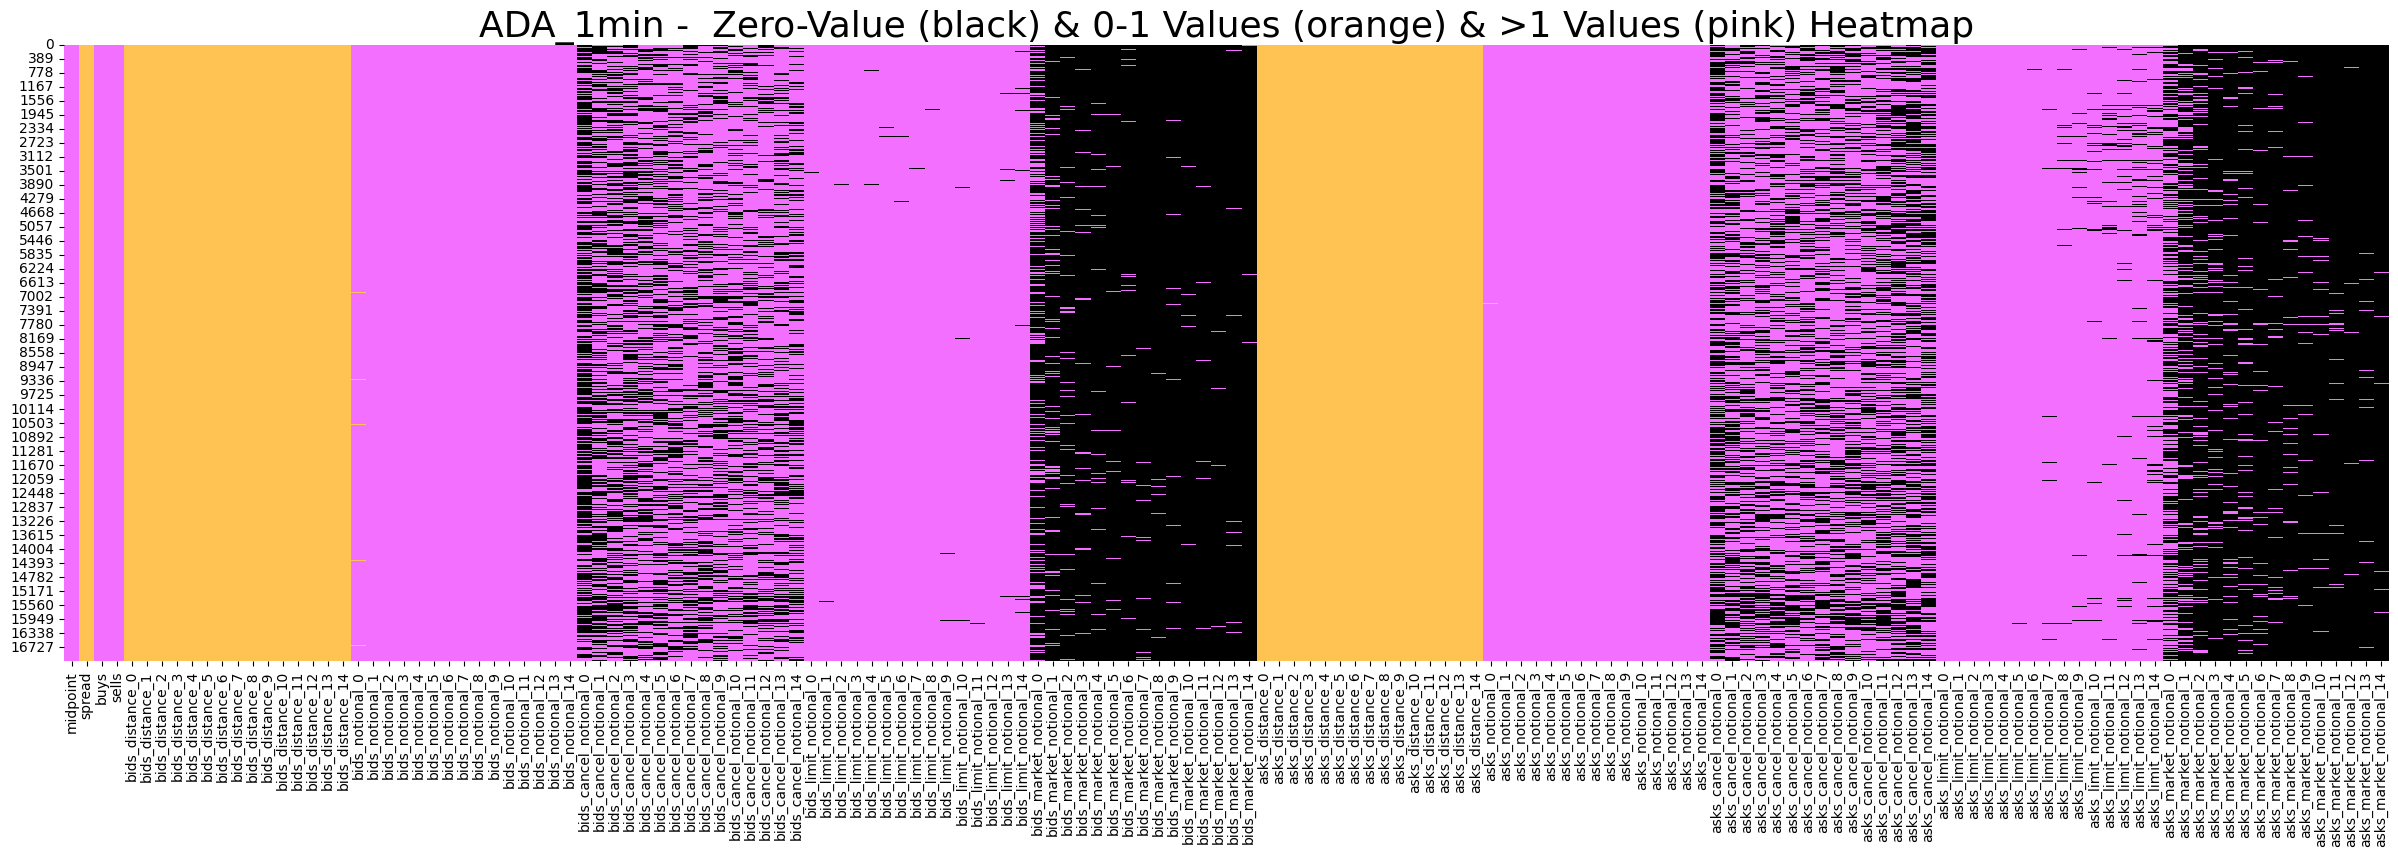

In [11]:

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = df.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=df.select_dtypes(include=[np.number]).columns)

ax.set_title(f'{asset}_{freq} -  Zero-Value (black) & 0-1 Values (orange) & >1 Values (pink) Heatmap', fontsize=26)
plt.show()

Overall the data is well marked because there are no missing values and Zero values happens usually happens in the columns that are logically correct (Market and Cancel bids and asks). In the cryptocurancy the vast of trade orders are executed via "limit" operations, which is approved by the data. 

## General statistics

In [12]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

display(df.describe().transpose())

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max
midpoint,17109.000000,1.315069,0.102193,1.134600,1.214800,1.299400,1.416200,1.557050
spread,17109.000000,0.000675,0.000703,0.000100,0.000400,0.000600,0.000800,0.020500
buys,17109.000000,44639.564661,55613.926652,67.853095,14182.818538,28261.829885,54570.713463,1292961.521024
sells,17109.000000,36779.682179,64715.084263,0.000000,6890.050129,17443.480364,41566.884257,2172322.949045
bids_distance_0,17109.000000,-0.000256,0.000275,-0.008092,-0.000303,-0.000211,-0.000143,-0.000032
bids_distance_1,17109.000000,-0.000398,0.000322,-0.008289,-0.000443,-0.000339,-0.000269,-0.000097
bids_distance_2,17109.000000,-0.000537,0.000410,-0.027652,-0.000586,-0.000464,-0.000380,-0.000165
bids_distance_3,17109.000000,-0.000668,0.000446,-0.028427,-0.000734,-0.000593,-0.000495,-0.000233
bids_distance_4,17109.000000,-0.000797,0.000465,-0.029281,-0.000872,-0.000725,-0.000614,-0.000300
bids_distance_5,17109.000000,-0.000922,0.000508,-0.029436,-0.000993,-0.000854,-0.000731,-0.000367


The only negative are "bids_distance_X", because they are calculated as "behind" midpoint.

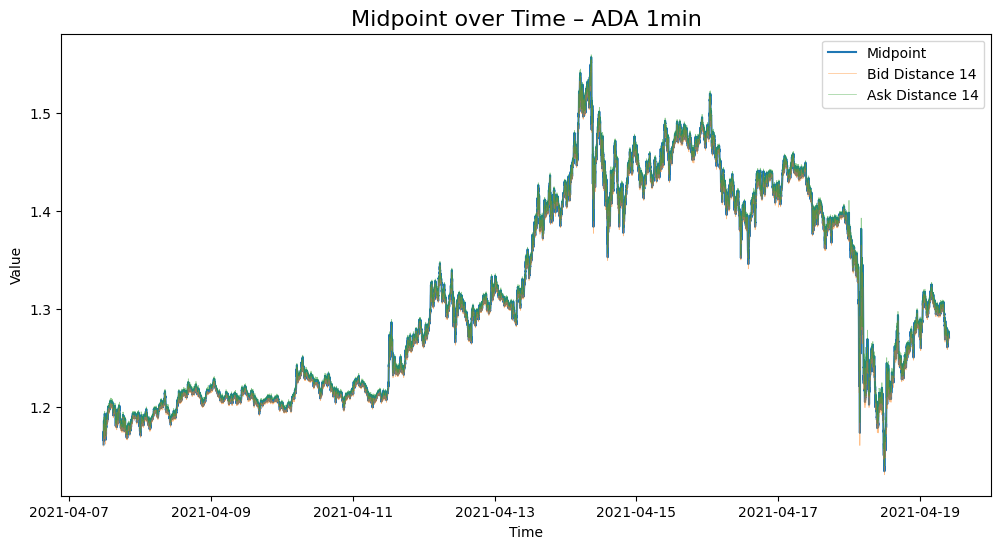

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['midpoint'], label='Midpoint', linewidth=1.5)
plt.plot(df.index, (1+df['bids_distance_14'])*df['midpoint'], label='Bid Distance 14', linewidth=0.5, alpha=0.5)
plt.plot(df.index, (1+df['asks_distance_14'])*df['midpoint'], label='Ask Distance 14', linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f'Midpoint over Time – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

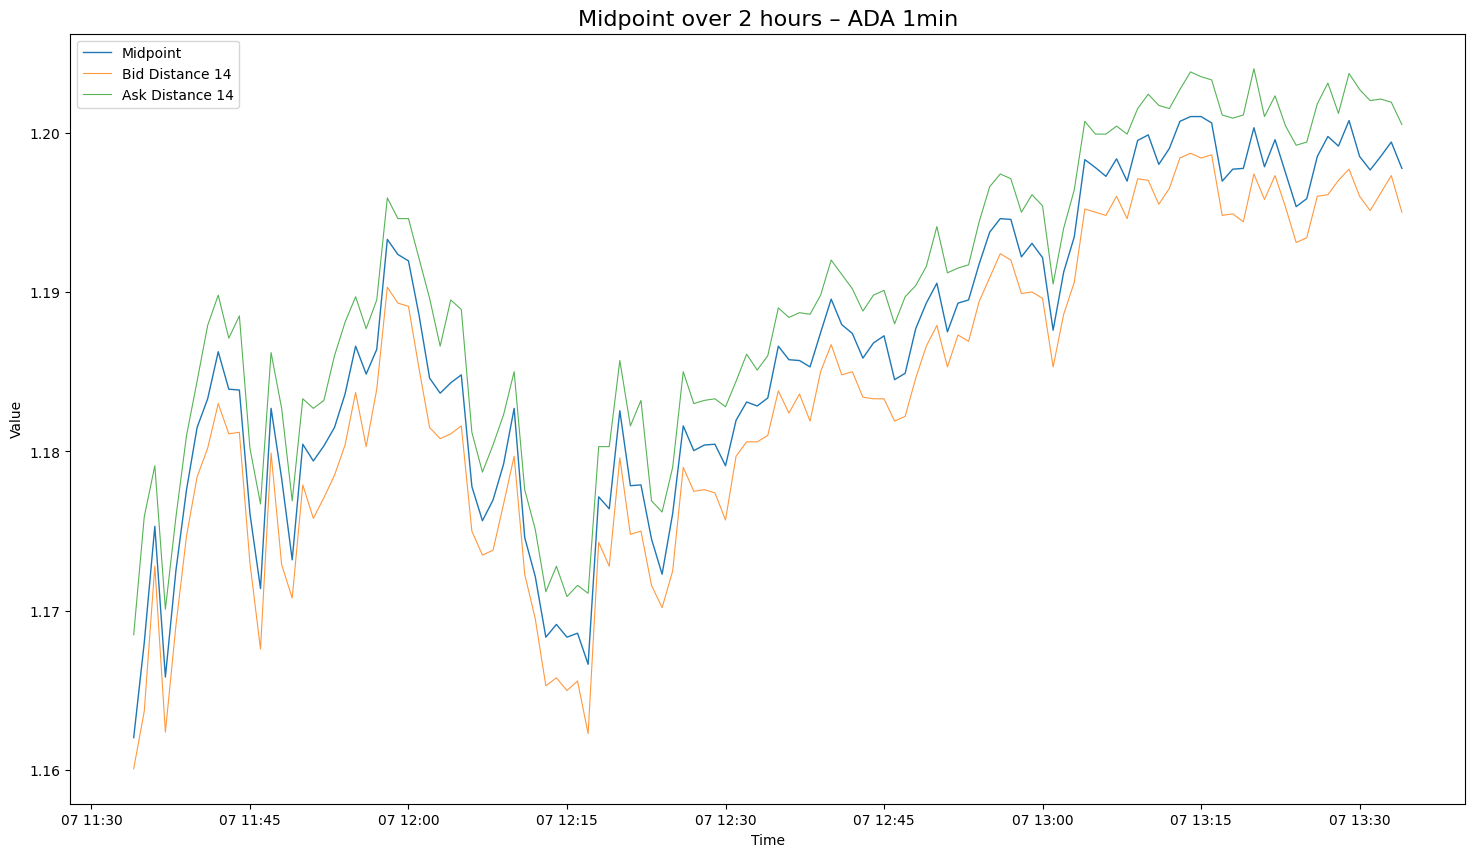

In [14]:
df_1day = df[df.index <= (df.index.min() + pd.Timedelta('2 hours'))]

plt.figure(figsize=(18, 10))
plt.plot(df_1day.index, df_1day['midpoint'], label='Midpoint', linewidth=1)
plt.plot(df_1day.index, (1+df_1day['bids_distance_14'])*df_1day['midpoint'], label='Bid Distance 14', linewidth=0.8, alpha=0.8)
plt.plot(df_1day.index, (1+df_1day['asks_distance_14'])*df_1day['midpoint'], label='Ask Distance 14', linewidth=0.8, alpha=0.8)
plt.legend()
plt.title(f'Midpoint over 2 hours – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Example of 3 rows

In [15]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.reset_option('display.precision')
pd.reset_option('display.float_format')

transposed_df = df.head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:34:00+00:00,2021-04-07 11:35:00+00:00,2021-04-07 11:36:00+00:00
system_time,2021-04-07 11:33:59.055697+00:00,2021-04-07 11:34:59.055697+00:00,2021-04-07 11:35:59.055697+00:00
midpoint,1.16205,1.168,1.1753
spread,0.0001,0.0022,0.0012
buys,56936.467913,56491.336799,52859.493359
sells,258248.957367,78665.28664,48459.173836
bids_distance_0,-0.000043,-0.000942,-0.000511
bids_distance_1,-0.000129,-0.001027,-0.000596
bids_distance_2,-0.000301,-0.001113,-0.000766
bids_distance_3,-0.000473,-0.001199,-0.000851
bids_distance_4,-0.000731,-0.00137,-0.000936


Even for the first 3 observations the data can highly variate. This is because of actively changing market.

In [16]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:34:00+00:00,2021-04-07 11:35:00+00:00,2021-04-07 11:36:00+00:00
bids_distance_0,-0.000043,-0.000942,-0.000511
bids_notional_0,876.869995,33769.671875,2466.870117
bids_cancel_notional_0,242372.171875,0.0,0.0
bids_limit_notional_0,244337.5,33769.671875,2466.870117
bids_market_notional_0,1088.469971,0.0,0.0
asks_distance_0,0.000043,0.000942,0.000511
asks_notional_0,3271.969971,3323.030029,2445.97998
asks_cancel_notional_0,697.549988,7154.089844,0.0
asks_limit_notional_0,3969.52002,4186.399902,2469.389893
asks_market_notional_0,0.0,0.0,23.41


The 0 level structure of the first 3 observations also shows that we are analysing actively changing market.


## Feature relatad visualizations

In [17]:
print(f'{asset} {freq} shape:', df.shape)

ADA 1min shape: (17109, 155)


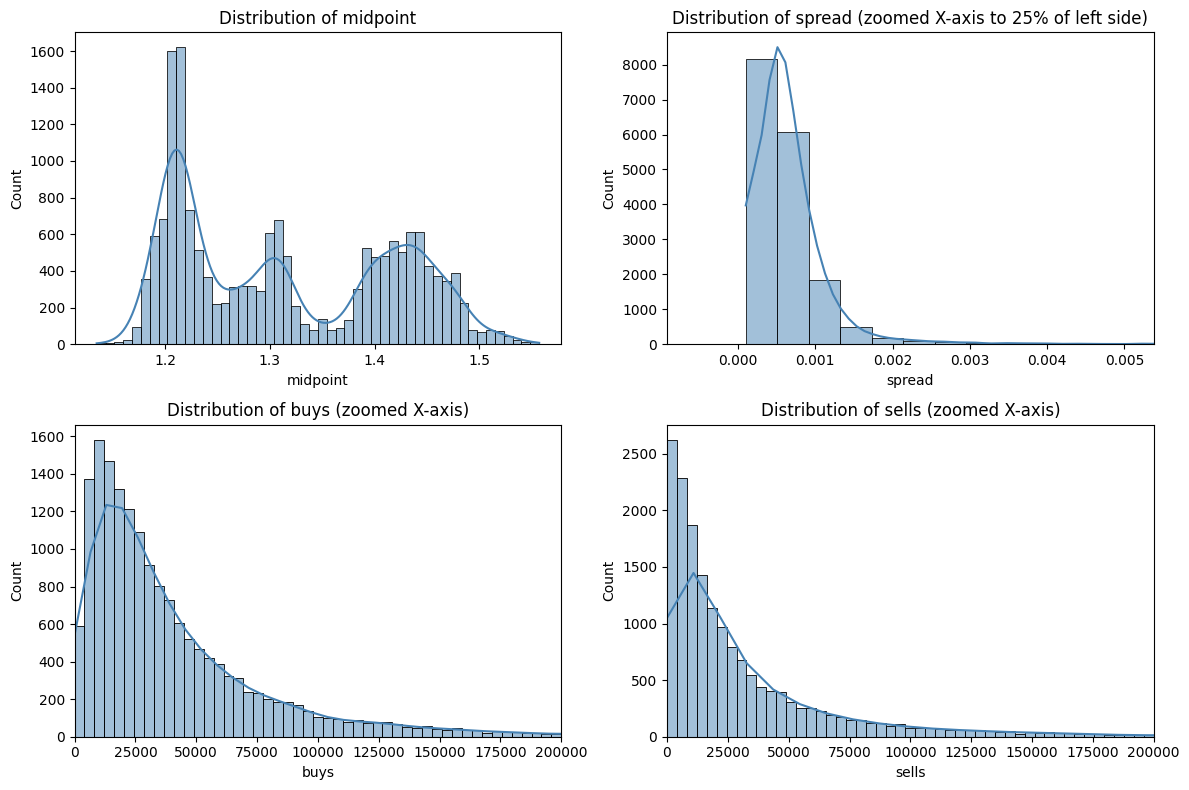

In [18]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    if i==1:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_xlim(right=axs[i].get_xlim()[1]*0.25)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis to 25% of left side)')
    elif i==2 or i==3:
        axs[i].set_xlim(right=0.2*1e6)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis)')
        bins = np.linspace(0, axs[i].get_xlim()[1], 50)
        sns.histplot(df[f], bins=bins, ax=axs[i], kde=True, color='steelblue')
    elif i==0:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

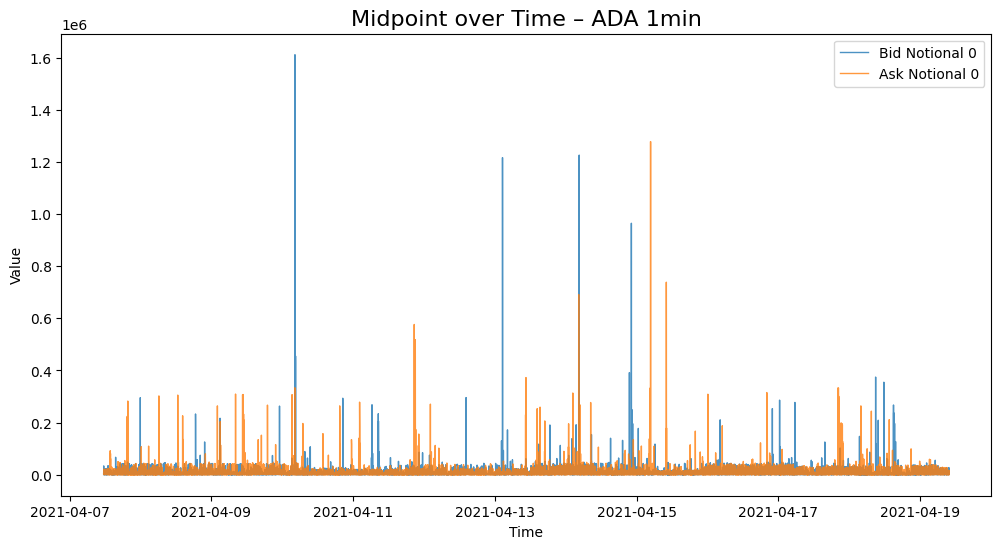

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(df.index, df['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – {} {}'.format(asset, freq), fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There are some observations of with extreme large values of Bid/Ask notional volumes.

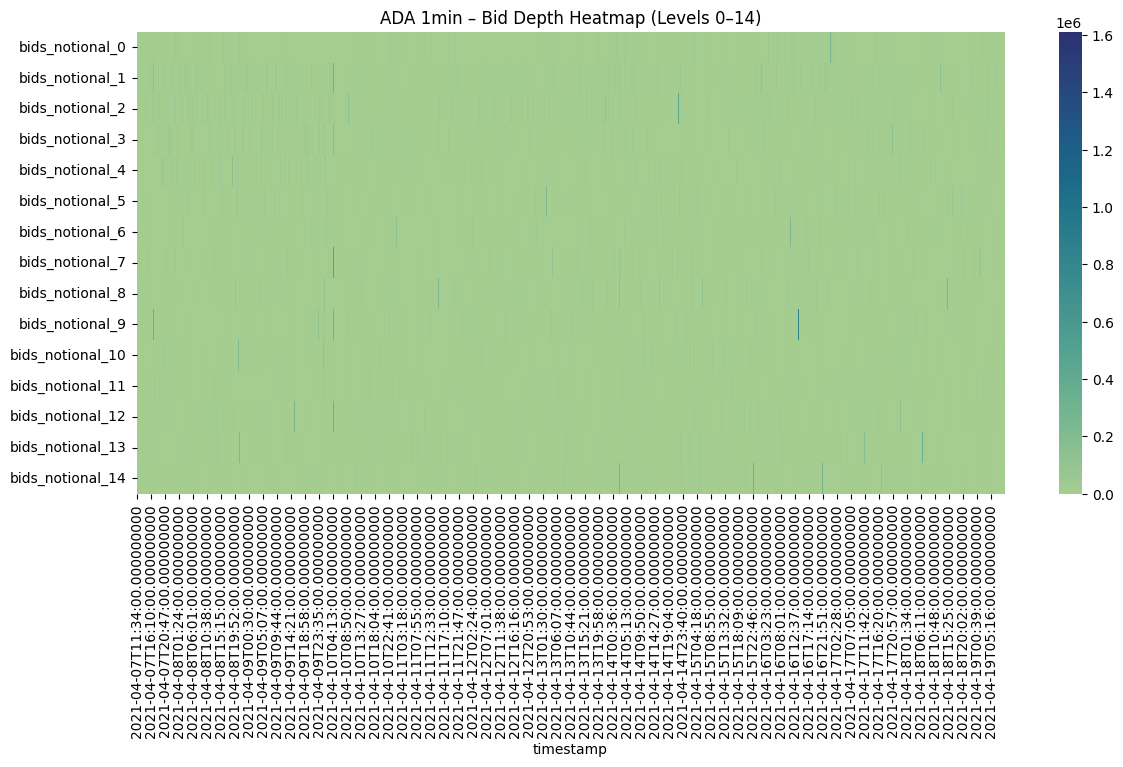

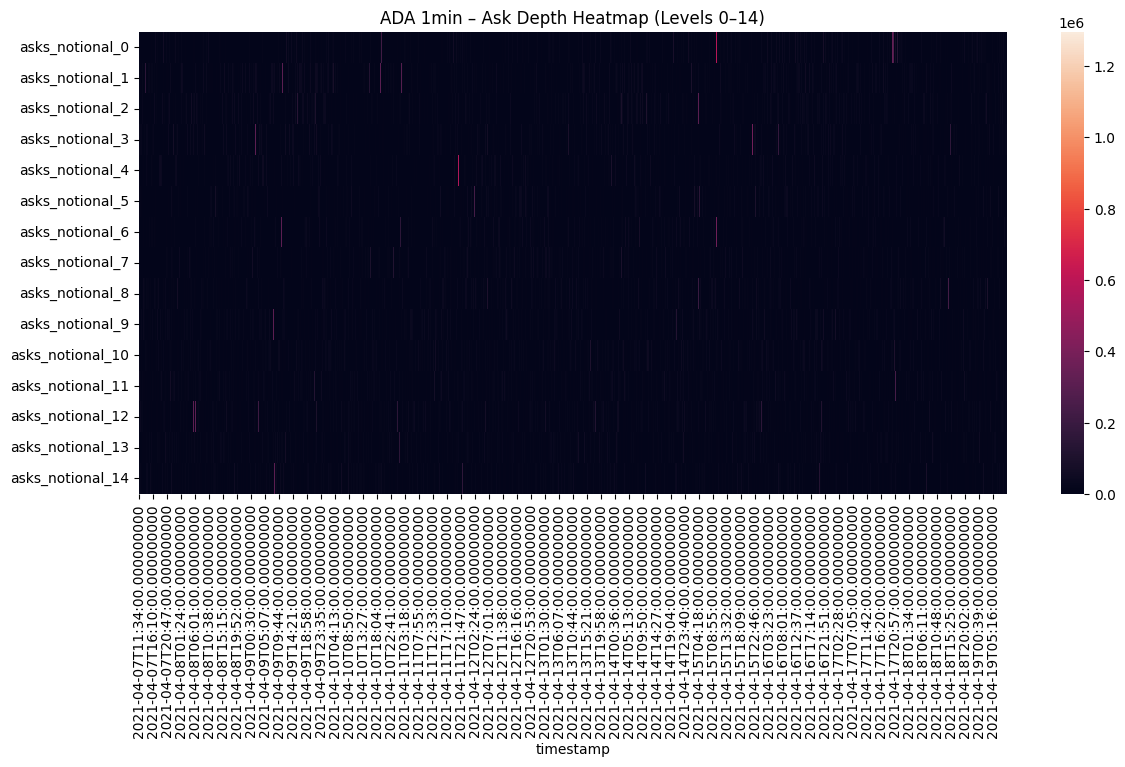

In [20]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[bid_levels].T, cmap='crest', cbar=True)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14)')
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[ask_levels].T, cmap='rocket', cbar=True)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14)')
plt.show()


There are just a few eye-catching spots on each heatmap. The log1p scaled potentionally show more information.

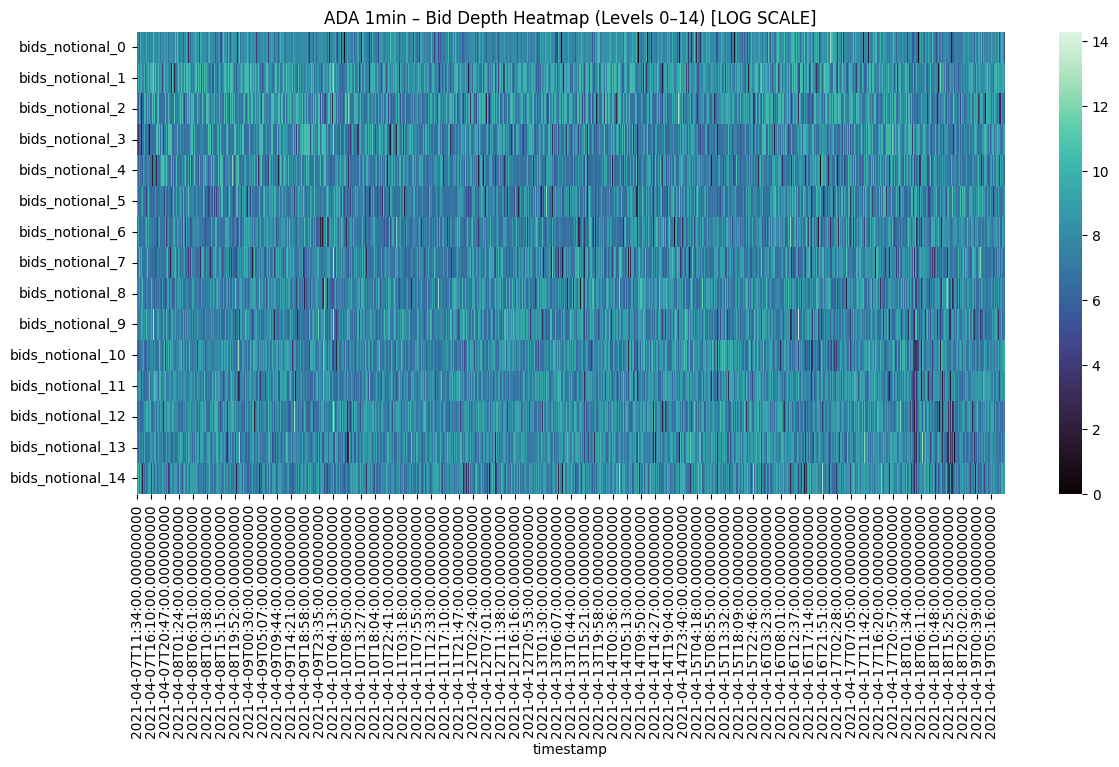

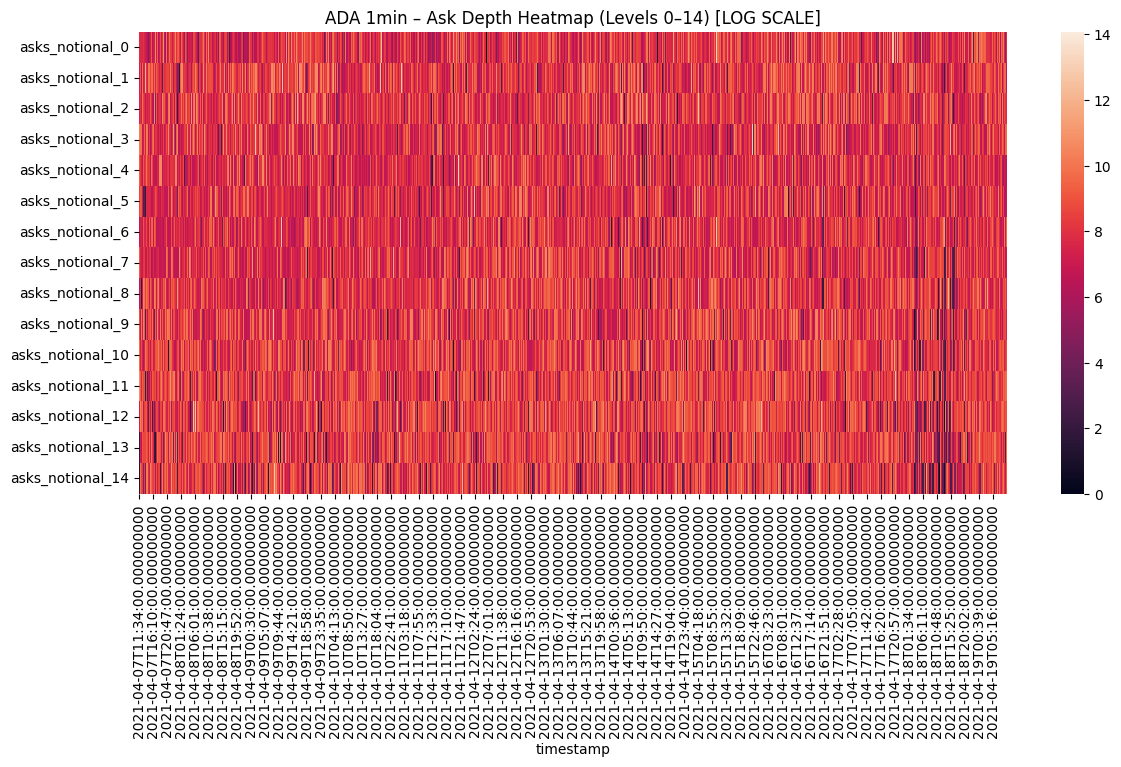

In [21]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()


At both heatmap the forst level is brighter than others (most orders executed close to the mid price). Also it is easier to understand low-volume areas (dark regions) with log scaled Notional volume. This information can be important for model. 

### Notional Volume

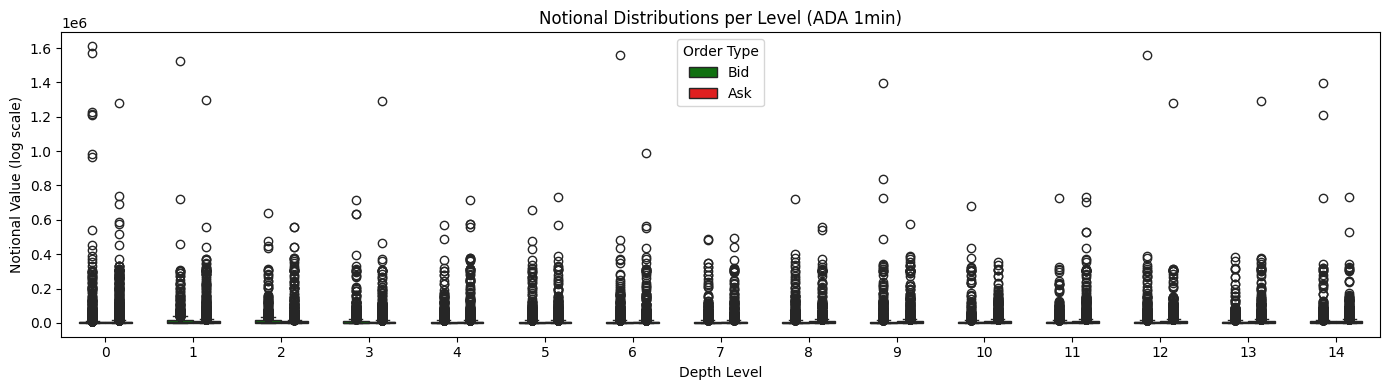

In [22]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_notional_{i}'], df[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title('Notional Distributions per Level ({} {})'.format(asset, freq))
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

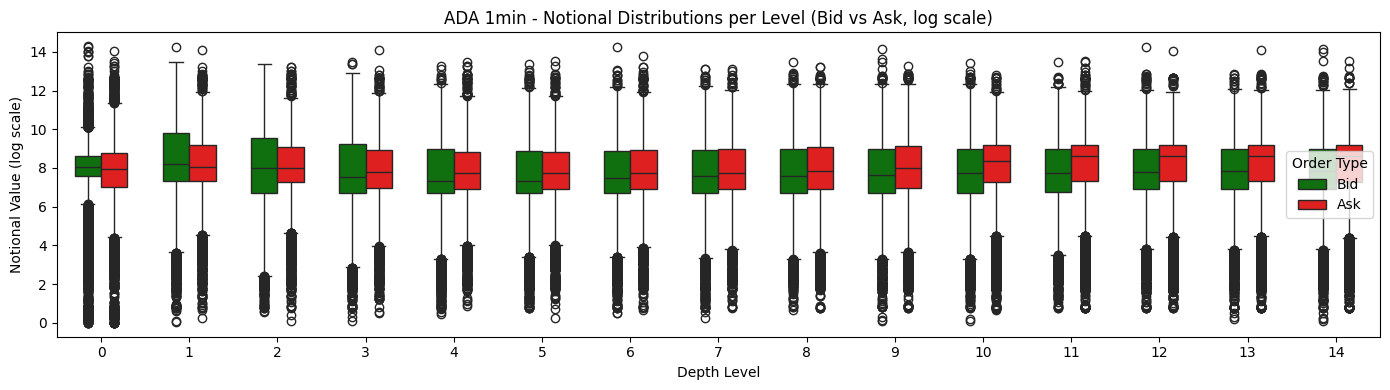

In [23]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title(f'{asset} {freq} - Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

The most pairs of Bid/Ask are close to earch other in terms of distribution of Notional volume, except the first level, where the volume is above other levels.

### Distance from midpoint

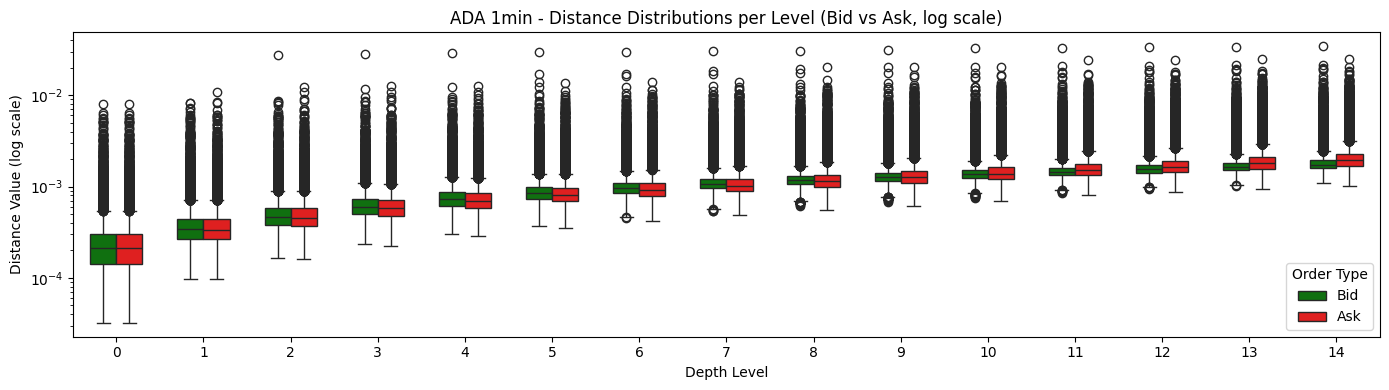

In [24]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_distance_{i}']*(-1), df[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title(f'{asset} {freq} - Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Usually the distance at the 0 level is very close to 0. At levels 1-14 the distance increases gradually.

### Calcel Volume

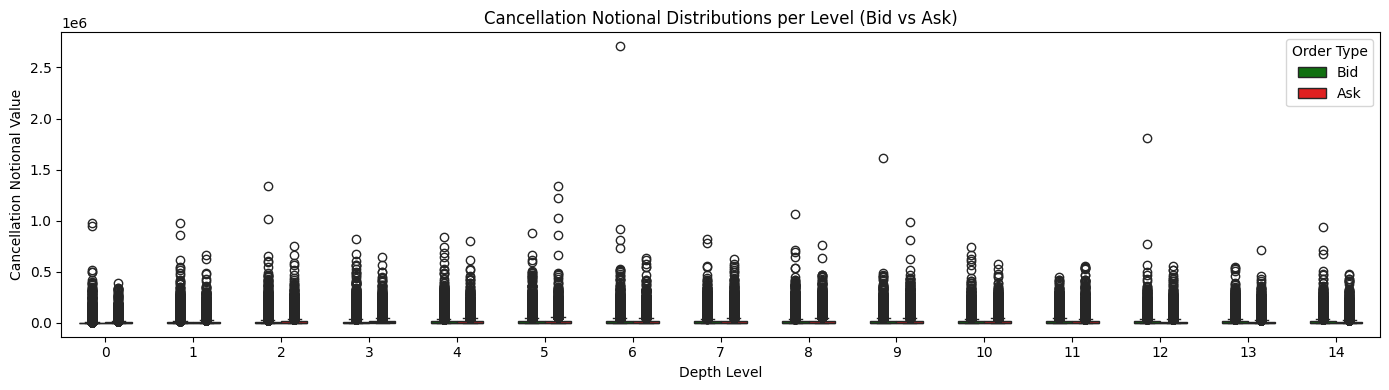

In [25]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_cancel_notional_{i}'], df[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Cancellation Notional Distributions per Level (Bid vs Ask)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [26]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
3869,0,Bid,9.773805e+05
14528,0,Bid,9.511644e+05
47206,1,Bid,8.642804e+05
49277,1,Bid,9.744894e+05
80744,2,Bid,1.013907e+06
80927,2,Bid,1.341785e+06
106356,3,Bid,8.159883e+05
152873,4,Bid,8.383061e+05
185682,5,Bid,8.759983e+05
191869,5,Ask,1.024191e+06


there are 13 outliers

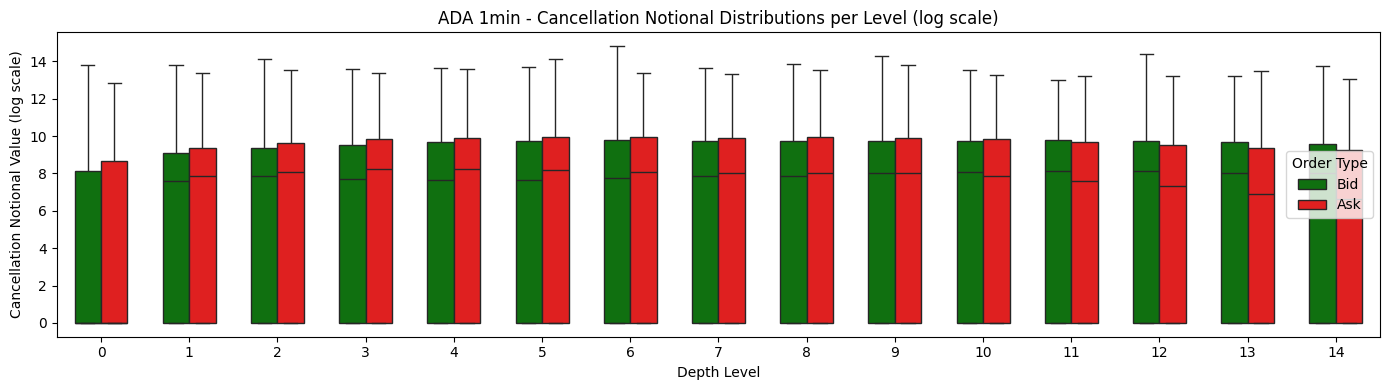

In [27]:
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Cancellation Notional Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

### Limit Volume

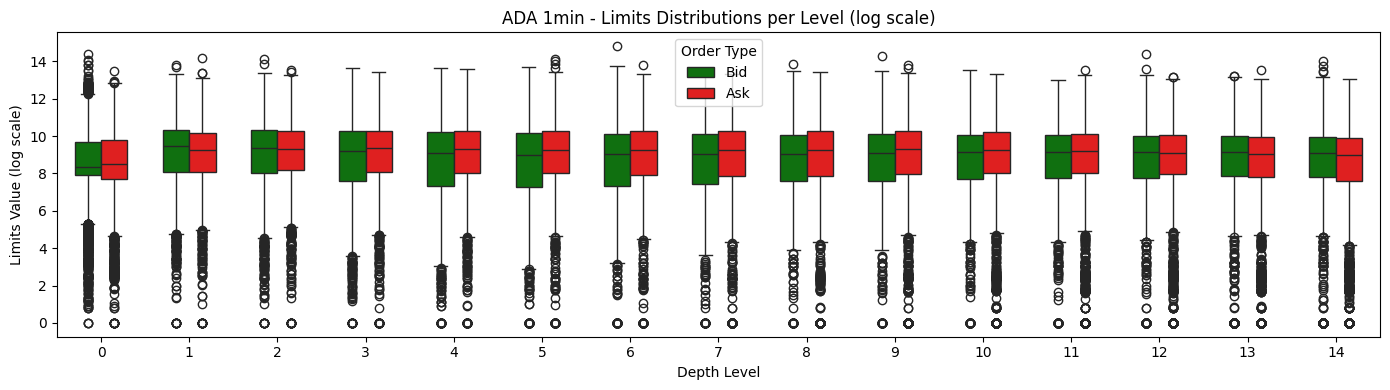

In [28]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_limit_notional_{i}'], df[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title(f'{asset} {freq} - Limits Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Limit volume is higher for 0 level and stable on other levels.

### Market Volume

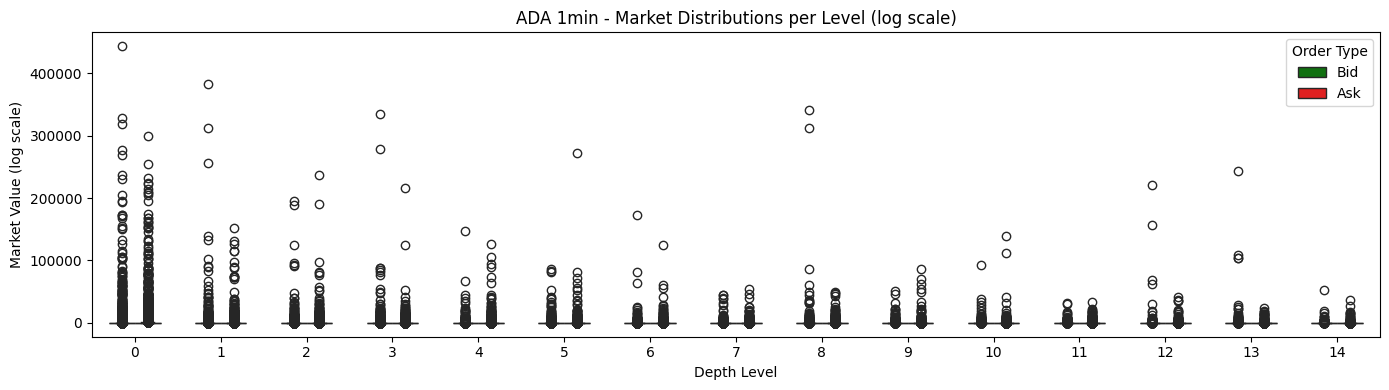

In [29]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_market_notional_{i}'], df[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

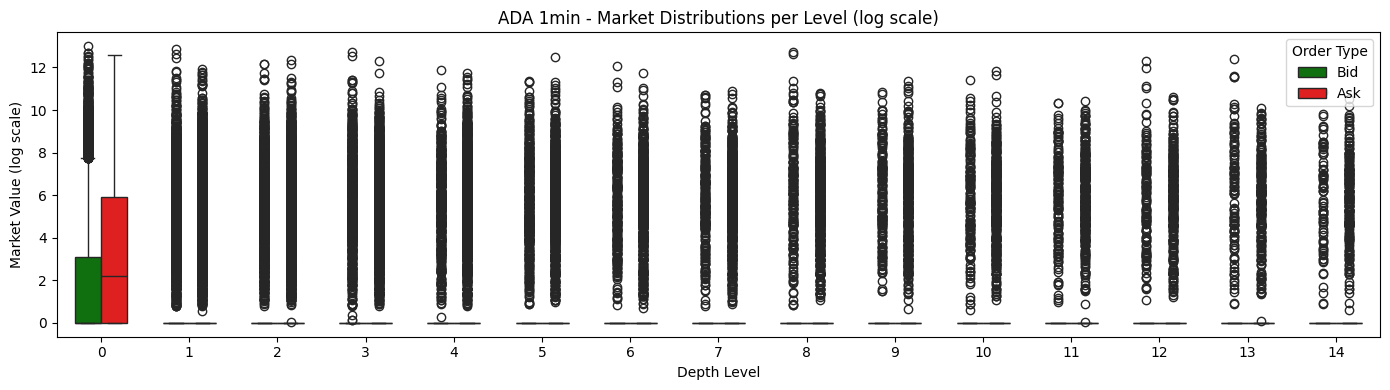

In [30]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

the Market volume shows mainly zero values on the levels 1-14. 

### Correlation matrix

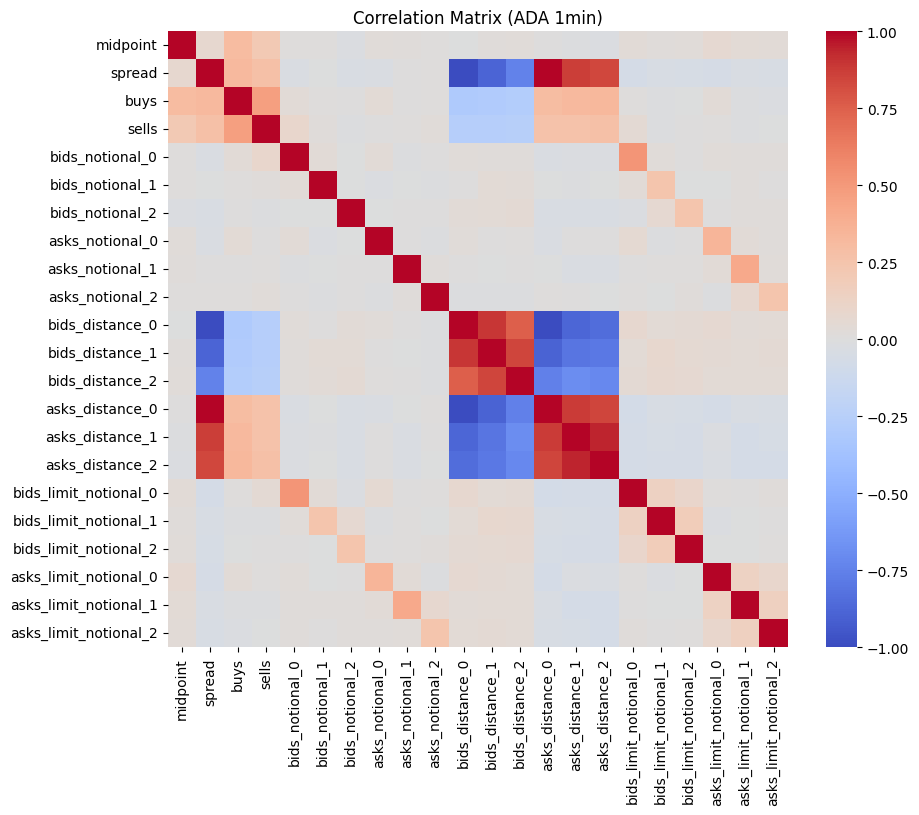

In [31]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)] + \
                 [f'bids_distance_{i}' for i in range(3)] + \
                 [f'asks_distance_{i}' for i in range(3)] + \
                 [f'bids_limit_notional_{i}' for i in range(3)] + \
                 [f'asks_limit_notional_{i}' for i in range(3)]

corr = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix ({} {})'.format(asset, freq))
plt.show()

There is a weak positive correlation between spread&sells and buys&sells, which usually make sence it any market. 

Also, there is a strong negative correlation between **spread** & **bids_distance_0** and strong positive correlation between **spread** & **asks_distance_0**. (the correlations decreases in absolute values for deeper levels)

There is strong negative correlation between **bids_distance_0** & **asks_distance_0**, whcih is also logically correct, because these features depends on the market activity at the considered time interval.